In [1]:
import numpy as np
import math as m
import sympy as sp
from sympy import *
import matplotlib.pyplot as plt # pyplot
import cv2
import os

In [2]:
import sim
import time
def connect(port):
# Establishing connection with COPPELIA
# The port must match the connection port in COPPELIA  -- START !!!
# returns the client number or -1 if you can't connect
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Connect
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID

In [3]:
#Connect to the COPPELIA server
#Run it every time the simulation restarts ***

clientID = connect(19999)

conectado a 19999


In [4]:
retCode,target=sim.simxGetObjectHandle(clientID,'ref_point',sim.simx_opmode_blocking)
retCode,home=sim.simxGetObjectHandle(clientID,'home',sim.simx_opmode_blocking)
retCode,rotate_joint = sim.simxGetObjectHandle(clientID,'Rotate_joint',sim.simx_opmode_blocking)
retCode,traslate_joint = sim.simxGetObjectHandle(clientID,'Traslate_joint',sim.simx_opmode_blocking)
retCode,revolute_joint = sim.simxGetObjectHandle(clientID,'Revolute_joint',sim.simx_opmode_blocking)
retCode,sensorHandle=sim.simxGetObjectHandle(clientID,'DVS128_sensor',sim.simx_opmode_blocking)
desplazamiento = 0

In [5]:
retCode,posicion=sim.simxGetObjectPosition(clientID,target,home,sim.simx_opmode_blocking)
posicion

[0.2449999898672104, 9.313225746154785e-09, -7.152557373046875e-07]

In [6]:
dir_path = os.getcwd()
dir_path = dir_path+"\Results"
os.chdir(dir_path)
print(dir_path)

cameraPMats = []

C:\Users\oriol\Desktop\RLP\SPRINT5\Simulation\Generate 3D Object Images\Results


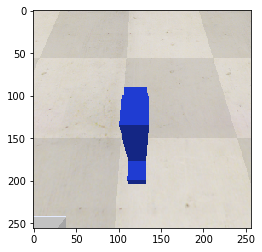

KeyboardInterrupt: 

In [7]:
##Move Camera Angle
sim.simxSetJointTargetPosition(clientID, revolute_joint, -60, sim.simx_opmode_blocking)

###################################
############# PHOTO 1 #############
###################################
for i in range(0,500,10):
            #----(+X)------- 
            posicion[0] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(2)

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
#get camera matrix
#aux=[]
#res = sim.simxGetObjectMatrix(sensorHandle,-1 ,aux)
#cameraPMats.append(res[1])
#aux=[]

img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
img = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite("img1.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(img)
plt.show()

###################################
############# PHOTO 2 #############
###################################
for i in range(0,-500,-10):
            #---(-Y)------- 
            posicion[1] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
 
 #rotate camera
sim.simxSetJointTargetPosition(clientID, rotate_joint, 330, sim.simx_opmode_blocking)   
time.sleep(2)

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
#get camera matrix
#aux=[]
#res = sim.simxGetObjectMatrix(sensorHandle,-1 ,aux)
#cameraPMats.append(res[1])
#aux=[]

img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
img = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite("img2.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(img)
plt.show()

###################################
############# PHOTO 3 #############
###################################
for i in range(500,0,-10):
            #---(-X)------ 
            posicion[0] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
            
#rotate camera            
sim.simxSetJointTargetPosition(clientID, rotate_joint, 285, sim.simx_opmode_blocking)            
time.sleep(2)

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
#get camera matrix
#aux=[]
#res = sim.simxGetObjectMatrix(sensorHandle,-1 ,aux)
#cameraPMats.append(res[1])
#aux=[]

img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
img = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite("img3.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(img)
plt.show()

###################################
############# PHOTO 4 #############
###################################

for i in range(0,-500,-10):
            #---(-X)------- 
            posicion[0] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)

#rotate camera
sim.simxSetJointTargetPosition(clientID, rotate_joint, 240, sim.simx_opmode_blocking)                       
time.sleep(2)

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
#get camera matrix
#aux=[]
#res = sim.simxGetObjectMatrix(sensorHandle,-1 ,aux)
#cameraPMats.append(res[1])
#aux=[]

img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
img = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite("img4.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(img)
plt.show()


###################################
############# PHOTO 5 #############
###################################

for i in range(-500,0,10):
            #----(+Y)------- 
            posicion[1] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)


#rotate camera         
sim.simxSetJointTargetPosition(clientID, rotate_joint, 45, sim.simx_opmode_blocking)                   
time.sleep(1)

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
#get camera matrix
#aux=[]
#res = sim.simxGetObjectMatrix(sensorHandle,-1 ,aux)
#cameraPMats.append(res[1])
#aux=[]
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
img = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite("img5.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(img)
plt.show()

###################################
############# PHOTO 6 #############
###################################

for i in range(0,500,10):
            #----(+Y)-------
            posicion[1] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)

#rotate camera
sim.simxSetJointTargetPosition(clientID, rotate_joint, 0, sim.simx_opmode_blocking)                
time.sleep(1)

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
#get camera matrix
#aux=[]
#res = sim.simxGetObjectMatrix(sensorHandle,-1 ,aux)
#cameraPMats.append(res[1])
#aux=[]
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
img = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite("img6.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(img)
plt.show()

###################################
############# PHOTO 7 #############
###################################

for i in range(-500,0,10):
            #----(+X)------- 
            posicion[0] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)

#rotate camera
sim.simxSetJointTargetPosition(clientID, rotate_joint, 150, sim.simx_opmode_blocking)            
time.sleep(1)

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
#get camera matrix
#aux=[]
#res = sim.simxGetObjectMatrix(sensorHandle,-1 ,aux)
#cameraPMats.append(res[1])
#aux=[]
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
img = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite("img7.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(img)
plt.show()



###################################
############# PHOTO 8 #############
###################################

for i in range(0,500,10):
            #----(+X)------
            posicion[0] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)

#rotate camera
sim.simxSetJointTargetPosition(clientID, rotate_joint, -240, sim.simx_opmode_blocking)            
time.sleep(1)

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
#get camera matrix
#aux=[]
#res = sim.simxGetObjectMatrix(sensorHandle,-1 ,aux)
#cameraPMats.append(res[1])
#aux=[]
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
img = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite("img8.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(img)
plt.show()


In [ ]:
print(cameraPMats)

In [ ]:
"""
##########################################################################
###################ANOTHER MOVEMENT OPTION --> NOT USED###################
##########################################################################
sim.simxSetJointTargetPosition(clientID, revolute_joint, -60, sim.simx_opmode_blocking)

#############PHOTO 1
for i in range(0,400,10):
            posicion[0] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(2)

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

for i in range(400,0,-10):
            posicion[0] = i/2000 
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(1)

#################PHOTO 2 
sim.simxSetJointTargetPosition(clientID, rotate_joint, 330, sim.simx_opmode_blocking)
for i in range(0,400,10):
            posicion[0] = i/2000
            posicion[1] = -(i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(2)    

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

for i in range(400,0,-10):
            posicion[0] = i/2000
            posicion[1] = -(i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(1)

####################PHOTO 3 
sim.simxSetJointTargetPosition(clientID, rotate_joint, 285, sim.simx_opmode_blocking)
for i in range(0,400,10):
            posicion[1] = -(i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(2)    

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

for i in range(400,0,-10):
            posicion[1] = -(i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(1)


#######PHOTO 4 
sim.simxSetJointTargetPosition(clientID, rotate_joint, 240, sim.simx_opmode_blocking)
for i in range(0,400,10):
            posicion[0] = -(i/2000)
            posicion[1] = -(i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(2)    

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

for i in range(400,0,-10):
            posicion[0] = -(i/2000)
            posicion[1] = -(i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(1)

########PHOTO 5 
sim.simxSetJointTargetPosition(clientID, rotate_joint, 45, sim.simx_opmode_blocking)
for i in range(0,400,10):
            posicion[0] = -(i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(2)    

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

for i in range(400,0,-10):
            posicion[0] = -(i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(1)


####PHOTO 6 
sim.simxSetJointTargetPosition(clientID, rotate_joint, 0, sim.simx_opmode_blocking)
for i in range(0,400,10):
            posicion[0] = -(i/2000)
            posicion[1] = (i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(2)    

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

for i in range(400,0,-10):
            posicion[0] = -(i/2000)
            posicion [1] = (i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(1)


###PHOTO 7
sim.simxSetJointTargetPosition(clientID, rotate_joint, 150, sim.simx_opmode_blocking)
for i in range(0,400,10):
            posicion[1] = (i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(2)    

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

for i in range(400,0,-10):
            posicion[1] = (i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(1)


##############PHOTO 8 
sim.simxSetJointTargetPosition(clientID, rotate_joint, -240, sim.simx_opmode_blocking)
for i in range(0,400,10):
            posicion[0] = (1/2000)
            posicion[1] = (i/2000)
            sim.simxSetObjectPosition(clientID,target,home,posicion,sim.simx_opmode_oneshot)
            time.sleep(0.05)
time.sleep(2)    

#take a photo
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

"""
